# **Importing Libraries**

In [66]:
import nltk
from nltk import pos_tag
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import requests as r
from wordcloud import WordCloud


from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# **Reading the files**


In [54]:
with open('/content/sample_data/speech_of_2021.txt','r')as speech:
  text1=speech.read()

In [55]:
with open ('/content/sample_data/speech_of_2022.txt','r') as speech:
  text2=speech.read()

# **Tokenization**

In [56]:
speech1= word_tokenize(text1)
speech2= word_tokenize(text2)

print(speech1)
print(speech2)

['2021', 'Speech', 'PM', "'s", 'Speech', 'on', 'Independence', 'day', '2021', 'My', 'dear', 'countrymen', '!', 'Best', 'wishes', 'to', 'all', 'of', 'you', 'and', 'those', 'who', 'love', 'India', 'and', 'democracy', 'from', 'all', 'over', 'the', 'world', 'on', 'the', 'occasion', 'of', 'the', 'Amrit', 'Mahotsav', 'of', 'freedom', ',', 'the', '75th', 'Independence', 'Day', '.', 'Today', ',', 'on', 'the', 'pious', 'festival', 'of', 'the', 'Amrit', 'Mahotsav', 'of', 'freedom', ',', 'the', 'country', 'is', 'bowing', 'to', 'all', 'its', 'freedom', 'fighters', 'and', 'brave', 'heroes', 'who', 'continue', 'to', 'sacrifice', 'themselves', 'day', 'and', 'night', 'in', 'the', 'defense', 'of', 'the', 'nation', '.', 'The', 'country', 'is', 'remembering', 'every', 'personality', ',', 'including', 'the', 'revered', 'Bapu', ',', 'who', 'made', 'freedom', 'a', 'mass', 'movement', ',', 'Netaji', 'Subhash', 'Chandra', 'Bose', ',', 'who', 'sacrificed', 'everything', 'for', 'the', 'freedom', ',', 'or', 'gre

# **stopwords**

In [57]:
#Remove stopwords
stopwords= set(stopwords.words('english'))
speech1= [word for word in speech1 if word not in stopwords]
speech2= [word for word in speech1 if word not in stopwords]
print(stopwords)


{'to', 'd', 'i', 'll', 'isn', 'such', "you're", 'it', 'not', "hasn't", 'what', 'ourselves', 'out', 'was', 'nor', "weren't", 'y', 'ain', 'so', 'above', 'your', 'theirs', 'again', 'once', "shan't", 'himself', 'their', 'than', 'there', 'we', 'ours', 'under', 'm', 'which', 'whom', 'have', 'as', 'his', 'off', "aren't", 'if', 'why', 'few', 'when', "shouldn't", 'this', 'an', 'those', "wasn't", 'shouldn', 'them', 'just', 'same', 'up', 'only', 'each', 'itself', "isn't", 'own', 'don', 'on', "wouldn't", 'wasn', 'from', 'yourself', 'these', 'below', 'me', 'hers', 'here', 'been', 'is', 'are', 'who', 'because', 'until', 'shan', "you'll", 'doing', 'at', 'ma', "she's", 'he', 'through', "couldn't", 're', "won't", 'in', 'she', 'its', 'during', 'does', "mustn't", 'other', 'before', 'didn', 't', 'herself', 'no', 'mustn', 'further', 'were', 'yours', 'be', 'both', 's', "that'll", 'into', 'do', 'can', 'couldn', 'hadn', 'how', 'you', 'won', 'while', "should've", 'will', 'against', 'most', 'a', 'some', 'after'

# **Lemmatization**

In [58]:
lemmatizer= nltk.WordNetLemmatizer()
speech1= [lemmatizer.lemmatize(word)for word in speech1]
speech2= [lemmatizer.lemmatize(word)for word in speech2]

print(speech1)
print(speech2)

['2021', 'Speech', 'PM', "'s", 'Speech', 'Independence', 'day', '2021', 'My', 'dear', 'countryman', '!', 'Best', 'wish', 'love', 'India', 'democracy', 'world', 'occasion', 'Amrit', 'Mahotsav', 'freedom', ',', '75th', 'Independence', 'Day', '.', 'Today', ',', 'pious', 'festival', 'Amrit', 'Mahotsav', 'freedom', ',', 'country', 'bowing', 'freedom', 'fighter', 'brave', 'hero', 'continue', 'sacrifice', 'day', 'night', 'defense', 'nation', '.', 'The', 'country', 'remembering', 'every', 'personality', ',', 'including', 'revered', 'Bapu', ',', 'made', 'freedom', 'mass', 'movement', ',', 'Netaji', 'Subhash', 'Chandra', 'Bose', ',', 'sacrificed', 'everything', 'freedom', ',', 'great', 'revolutionary', 'like', 'Bhagat', 'Singh', ',', 'Chandrasekhar', 'Azad', ',', 'Bismil', 'Ashfaqulla', 'Khan', ';', 'Rani', 'Jhansi', 'Lakshmibai', ',', 'Queen', 'Chennamma', 'Kittur', 'Rani', 'Gaidinliu', 'valour', 'MatanginiHazra', 'Assam', ';', 'country', "'s", 'first', 'Prime', 'Minister', 'Pandit', 'Nehru', '

# **Stemming**

In [59]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language='english')
speech1=[stemmer.stem(word) for word in speech1]
speech2= [stemmer.stem(word) for word in speech2]

print(speech1)
print(speech2)

['2021', 'speech', 'pm', "'s", 'speech', 'independ', 'day', '2021', 'my', 'dear', 'countryman', '!', 'best', 'wish', 'love', 'india', 'democraci', 'world', 'occas', 'amrit', 'mahotsav', 'freedom', ',', '75th', 'independ', 'day', '.', 'today', ',', 'pious', 'festiv', 'amrit', 'mahotsav', 'freedom', ',', 'countri', 'bow', 'freedom', 'fighter', 'brave', 'hero', 'continu', 'sacrific', 'day', 'night', 'defens', 'nation', '.', 'the', 'countri', 'rememb', 'everi', 'person', ',', 'includ', 'rever', 'bapu', ',', 'made', 'freedom', 'mass', 'movement', ',', 'netaji', 'subhash', 'chandra', 'bose', ',', 'sacrif', 'everyth', 'freedom', ',', 'great', 'revolutionari', 'like', 'bhagat', 'singh', ',', 'chandrasekhar', 'azad', ',', 'bismil', 'ashfaqulla', 'khan', ';', 'rani', 'jhansi', 'lakshmibai', ',', 'queen', 'chennamma', 'kittur', 'rani', 'gaidinliu', 'valour', 'matanginihazra', 'assam', ';', 'countri', "'s", 'first', 'prime', 'minist', 'pandit', 'nehru', 'ji', ',', 'sardar', 'vallabhbhai', 'patel',

# **POS Tagging**

In [111]:
# Split the texts into a list of words
text1_words = text1.split()
text2_words = text2.split()

# Apply part-of-speech tagging
speech1 = pos_tag(text1_words)
speech2 = pos_tag(text2_words)
print(speech1)
print(speech2)



[('2021', 'CD'), ('Speech', 'NNP'), ("PM's", 'NNP'), ('Speech', 'NNP'), ('on', 'IN'), ('Independence', 'NNP'), ('day', 'NN'), ('2021', 'CD'), ('My', 'NNP'), ('dear', 'JJ'), ('countrymen!', 'NN'), ('Best', 'NNP'), ('wishes', 'VBZ'), ('to', 'TO'), ('all', 'DT'), ('of', 'IN'), ('you', 'PRP'), ('and', 'CC'), ('those', 'DT'), ('who', 'WP'), ('love', 'VBP'), ('India', 'NNP'), ('and', 'CC'), ('democracy', 'NN'), ('from', 'IN'), ('all', 'DT'), ('over', 'IN'), ('the', 'DT'), ('world', 'NN'), ('on', 'IN'), ('the', 'DT'), ('occasion', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Amrit', 'NNP'), ('Mahotsav', 'NNP'), ('of', 'IN'), ('freedom,', 'NN'), ('the', 'DT'), ('75th', 'CD'), ('Independence', 'NNP'), ('Day.', 'NNP'), ('Today,', 'NNP'), ('on', 'IN'), ('the', 'DT'), ('pious', 'JJ'), ('festival', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Amrit', 'NNP'), ('Mahotsav', 'NNP'), ('of', 'IN'), ('freedom,', 'NN'), ('the', 'DT'), ('country', 'NN'), ('is', 'VBZ'), ('bowing', 'VBG'), ('to', 'TO'), ('all', 'DT'), ('it

# **word cloud**

In [80]:
from wordcloud import WordCloud

# Extract the words from speech1 and speech2
speech1_words = [word for word, _ in speech1]
speech2_words = [word for word, _ in speech2]

# Generate word clouds
wordcloud1 = WordCloud(width=1000, height=600).generate(' '.join(speech1_words))
wordcloud2 = WordCloud(width=1000, height=600).generate(' '.join(speech2_words))


# **Repeated word from both the speeches**

(-0.5, 999.5, 599.5, -0.5)

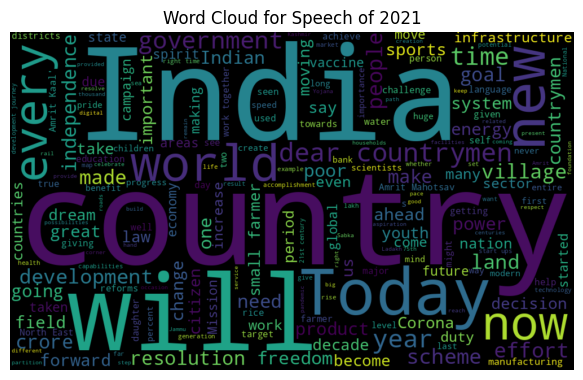

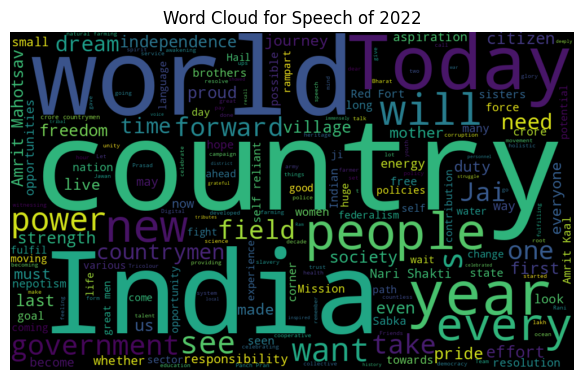

In [92]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(16, 8))  # for speech of 2021
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1.to_array(), interpolation='bilinear')
plt.title('Word Cloud for Speech of 2021')
plt.axis("off")

plt.figure(figsize=(16, 8))  # for speech of 2021
plt.subplot(1, 2, 1)
plt.imshow(wordcloud2.to_array(), interpolation='bilinear')
plt.title('Word Cloud for Speech of 2022')
plt.axis("off")




In [138]:
common_words = set(tokens1) & set(tokens2)
print(common_words)


{'go', 'wait', 'manufacturing', 'provide', 'Vallabhbhai', 'duty', 'get', '100', 'salute', 'not', 'ourselves', 'peaceful', 'decision', 'endowed', 'also', 'change', 'police', 'so', 'Be', 'Subhash', 'opened', 'low', 'full', 'once', 'list', 'and,', 'strength', 'feeling', 'don’t', 'Till', 'fortune', 'there', 'Amrit', 'under', 'which', 'ji,', 'have', 'as', 'his', 'revered', 'Now', 'nation.', 'fulfilling', 'engaged', 'proud', 'say', 'pace.', 'citizen', 'several', 'opportunity', 'few', 'if', 'conservation', 'opening', 'That', 'an', 'this', 'Azad,', 'those', 'sure', 'this.', 'population', 'lead', 'them', 'festival', 'target', 'law', 'lives', 'I', '25', 'honour', 'Whether', 'hard', 'could', 'always', 'India’s', 'lakhs', 'Deep', 'gave', 'he', 'give', 'decades', 'fast', 'health', 'glory', 'free', 'Let', 'friends,', 'farming', 'one', 'due', 'voice', 'realizing', 'India.', 'power', 'definitely', 'does', 'mother', 'Policy', 'built', 'like', 'speech', 'independence', 'optical', 'become', 'away', 'idea

# **Common words from both speeches**

(-0.5, 399.5, 199.5, -0.5)

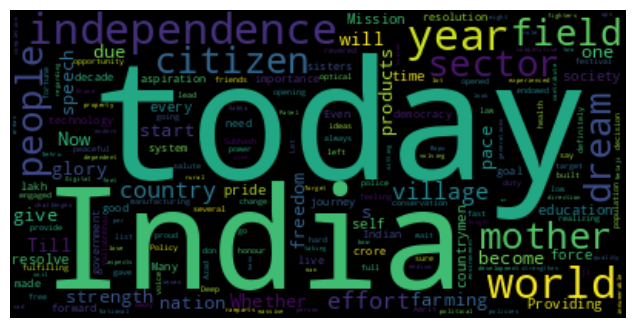

In [139]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(10, 4))

# Convert tuples to strings in common_words
common_words = [' '.join(word) if isinstance(word, tuple) else word for word in common_words]

wordcloud = WordCloud().generate(' '.join(common_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


# **Sentiment Analysis**

In [93]:
#Sentimetal Analysis
Senti_ment=SentimentIntensityAnalyzer()
# for speech 1
sentiment1=Senti_ment.polarity_scores(text1)
print(sentiment1)

#for speech 2
sentiment2=Senti_ment.polarity_scores(text2)
print(sentiment2)

{'neg': 0.042, 'neu': 0.796, 'pos': 0.162, 'compound': 1.0}
{'neg': 0.047, 'neu': 0.777, 'pos': 0.176, 'compound': 1.0}


In [117]:

# Creating an instance of the SentimentIntensityAnalyzer
senti_ment = SentimentIntensityAnalyzer()

# Assuming you have assigned text data to the tokens1 and tokens2 variables as strings
tokens1 = speech1_words
tokens2 = speech2_words

# Extracting positive & negative words
negative_words = [word for word in ' '.join(tokens1).split() + ' '.join(tokens2).split() if senti_ment.polarity_scores(word)['compound'] < 0]
positive_words = [word for word in ' '.join(tokens1).split() + ' '.join(tokens2).split() if senti_ment.polarity_scores(word)['compound'] > 0]

min_length = min(len(negative_words), len(positive_words))
negative_words = negative_words[:min_length]
positive_words = positive_words[:min_length]

# Creating a DataFrame for sentiment analysis
df = pd.DataFrame({'Negative Words': negative_words, 'Positive Words': positive_words})
print(df)


    Negative Words Positive Words
0         fighters           dear
1           fought           Best
2             pain         wishes
3          slavery           love
4          longing       freedom,
..             ...            ...
169         jailed           dear
170            low          boost
171         hatred        created
172      adversely         easily
173         menace           dear

[174 rows x 2 columns]


# Positive **Words**

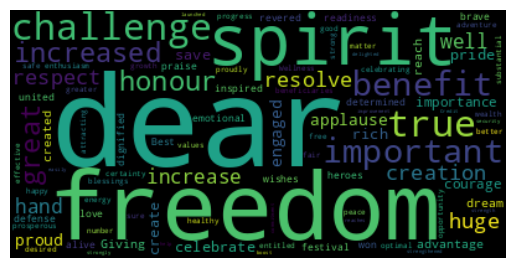

In [126]:
wordcloud = WordCloud().generate(' '.join(positive_words))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

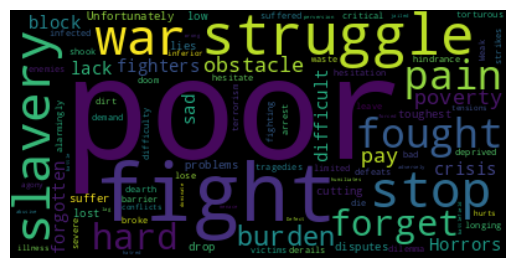

In [127]:
wordcloud = WordCloud().generate(' '.join(negative_words))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()